### Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Decision Tree & Random Forest

### Loading and splitting the data.

In [4]:
#load sampled and downsampled data
downsampledData = np.genfromtxt('dataset_down_sampling.csv', delimiter=",")
upsampledData = np.genfromtxt('dataset_up_sampling.csv', delimiter=",")

In [5]:
print('downsampledData size: ', downsampledData.shape)

downsampledData size:  (7564, 12)


In [6]:
#splitting train and test data in 80:20 proportion respectively
X_train_down, X_test_down, y_train_down, y_test_down = sklearn.model_selection.train_test_split(downsampledData[:, :-1], 
                                                                                    downsampledData[:,-1],
                                                                                    test_size=0.2, random_state=0)
X_train_up, X_test_up, y_train_up, y_test_up = sklearn.model_selection.train_test_split(upsampledData[:, :-1], 
                                                                                    upsampledData[:,-1],
                                                                                    test_size=0.2, random_state=0)

In [54]:
#defining the evaluation method
def evaluate (y_test, y_predict):
    accuracy = sklearn.metrics.accuracy_score(y_test, y_predict)*100
    precision = sklearn.metrics.precision_score(y_test, y_predict)*100
    recall = sklearn.metrics.recall_score(y_test, y_predict)*100
    roc = sklearn.metrics.roc_auc_score(y_test,y_predict)*100
    print('Accuracy = %.2f%%' %accuracy)
    print('Precision = %.2f%%' %precision)
    print('Recall = %.2f%%' %recall)
    print('ROC = %.2f%%' %roc)

    return accuracy, precision, recall, roc

def plotConfusionMatrix(X_test,y_test,model,title):
    
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)    
    
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.title(title)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

#feature analysis
def featurePlot(labels,scores,title,color):
    
    plt.figure(figsize=(16, 8))
    plt.bar(labels,scores, color=color, edgecolor='black')
    plt.title(title)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.ylim(0,0.5)
    plt.ylabel('Importance %')

### Decision Tree: Downsampled Data

In [9]:
#create and train Decision Tree classifer object
tree_downsampled = DecisionTreeClassifier(criterion='gini', max_features="sqrt").fit(X_train_down, y_train_down)

In [10]:
#predict the results
ypred_train_down = tree_downsampled.predict(X_train_down)
ypred_test_down = tree_downsampled.predict(X_test_down)

In [11]:
#print the results
print("Training Results:\n")
print(classification_report(y_train_down, ypred_train_down))

print("\n\nTesting Results:\n")
print(classification_report(y_test_down, ypred_test_down))

Training Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3020
         1.0       1.00      1.00      1.00      3031

    accuracy                           1.00      6051
   macro avg       1.00      1.00      1.00      6051
weighted avg       1.00      1.00      1.00      6051



Testing Results:

              precision    recall  f1-score   support

         0.0       0.67      0.68      0.67       762
         1.0       0.67      0.65      0.66       751

    accuracy                           0.67      1513
   macro avg       0.67      0.67      0.67      1513
weighted avg       0.67      0.67      0.67      1513



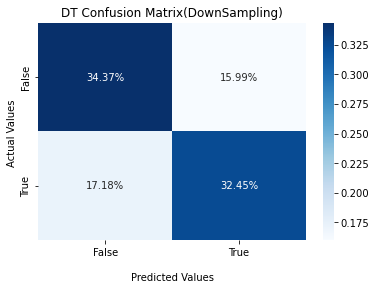

In [13]:
#plot confusion matrix as a heatmap
plotConfusionMatrix(X_test_down,y_test_down,tree_downsampled,"DT Confusion Matrix(DownSampling)")

In [14]:
#print the evaluation metrics
acc_dt_down, precision_dt_down, recall_dt_down, roc_dt_down = evaluate(y_test_down, ypred_test_down)

Accuracy = 66.82%
Precision = 66.98%
Recall = 65.38%
ROC = 66.81%


### Decision Tree: Upsampled Data

In [15]:
#create and train Decision Tree classifer object
tree_upsampled = DecisionTreeClassifier(criterion='gini',max_features="sqrt").fit(X_train_up, y_train_up)

In [16]:
#predict the results
ypred_train_up = tree_upsampled.predict(X_train_up)
ypred_test_up = tree_upsampled.predict(X_test_up)

In [17]:
#print the results
print("Training Results:\n")
print(classification_report(y_train_up, ypred_train_up))

print("\n\nTesting Results:\n")
print(classification_report(y_test_up, ypred_test_up))

Training Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10059
         1.0       1.00      1.00      1.00     10013

    accuracy                           1.00     20072
   macro avg       1.00      1.00      1.00     20072
weighted avg       1.00      1.00      1.00     20072



Testing Results:

              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88      2486
         1.0       0.84      0.96      0.90      2532

    accuracy                           0.89      5018
   macro avg       0.90      0.89      0.89      5018
weighted avg       0.90      0.89      0.89      5018



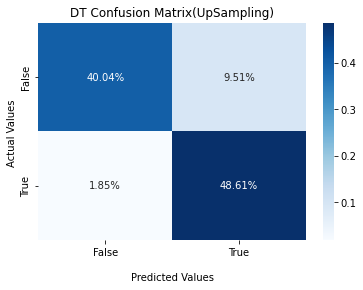

In [18]:
#plot confusion matrix as a heatmap
plotConfusionMatrix(X_test_up,y_test_up,tree_upsampled,"DT Confusion Matrix(UpSampling)")

In [26]:
#print the evaluation metrics
acc_dt_up, precision_dt_up, recall_dt_up, roc_dt_up = evaluate(y_test_up, ypred_test_up)

Accuracy = 88.64%
Precision = 83.64%
Recall = 96.33%
ROC = 88.57%


### Random Forest: Downsampled Data

In [27]:
#create and train Random Forest classifer object
forest_downsampled = RandomForestClassifier(criterion='gini', random_state=0).fit(X_train_down, y_train_down)

In [28]:
#predict the results
ypred_train_down = forest_downsampled.predict(X_train_down)
ypred_test_down = forest_downsampled.predict(X_test_down)

In [29]:
#print the results
print("Training Results:\n")
print(classification_report(y_train_down, ypred_train_down))

print("\n\nTesting Results:\n")
print(classification_report(y_test_down, ypred_test_down))


Training Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3020
         1.0       1.00      1.00      1.00      3031

    accuracy                           1.00      6051
   macro avg       1.00      1.00      1.00      6051
weighted avg       1.00      1.00      1.00      6051



Testing Results:

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78       762
         1.0       0.79      0.72      0.76       751

    accuracy                           0.77      1513
   macro avg       0.77      0.77      0.77      1513
weighted avg       0.77      0.77      0.77      1513



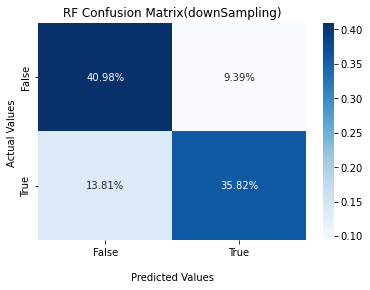

In [30]:
#plot confusion matrix as a heatmap
plotConfusionMatrix(X_test_down,y_test_down,forest_downsampled,"RF Confusion Matrix(downSampling)")

In [31]:
#print the evaluation metrics
acc_rf_down, precision_rf_down, recall_rf_down, roc_rf_down = evaluate(y_test_down, ypred_test_down)

Accuracy = 76.80%
Precision = 79.24%
Recall = 72.17%
ROC = 76.77%


### Random Forest: Upsampled Data

In [32]:
#create and train Random Forest classifer object
forest_upsampled = RandomForestClassifier(criterion='gini', random_state=0).fit(X_train_up, y_train_up)

In [33]:
#predict the results
ypred_train_up = forest_upsampled.predict(X_train_up)
ypred_test_up = forest_upsampled.predict(X_test_up)

In [34]:
#print the results
print("Training Results:\n")
print(classification_report(y_train_up, ypred_train_up))

print("\n\nTesting Results:\n")
print(classification_report(y_test_up, ypred_test_up))


Training Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10059
         1.0       1.00      1.00      1.00     10013

    accuracy                           1.00     20072
   macro avg       1.00      1.00      1.00     20072
weighted avg       1.00      1.00      1.00     20072



Testing Results:

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      2486
         1.0       0.88      0.97      0.92      2532

    accuracy                           0.92      5018
   macro avg       0.92      0.92      0.92      5018
weighted avg       0.92      0.92      0.92      5018



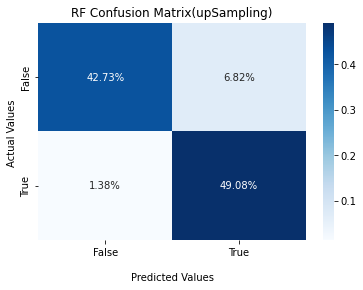

In [35]:
#plot confusion matrix as a heatmap
plotConfusionMatrix(X_test_up,y_test_up,forest_upsampled,"RF Confusion Matrix(upSampling)")

In [37]:
#print the evaluation metrics
acc_rf_up, precision_rf_up, recall_rf_up, roc_rf_up = evaluate(y_test_up, ypred_test_up)

Accuracy = 91.81%
Precision = 87.81%
Recall = 97.27%
ROC = 91.76%


### Plotting evaluation metrics

Text(0, 0.5, 'ROC %')

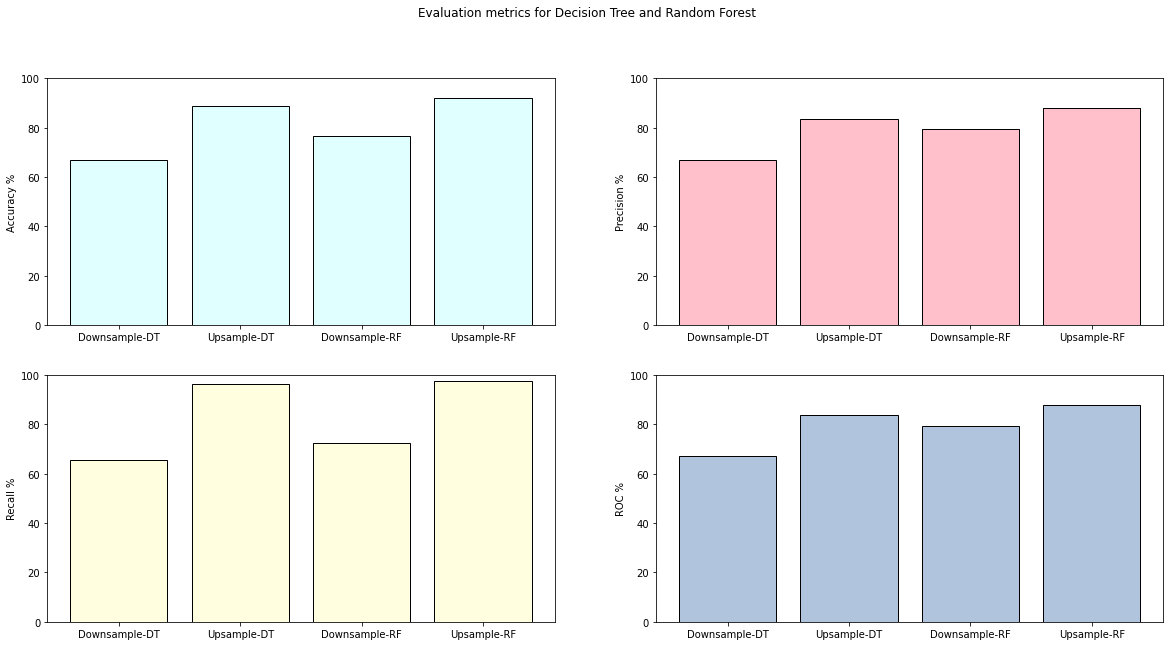

In [38]:
#DT- Decision Tree, RF - Random Forest
labels = ['Downsample-DT', 'Upsample-DT', 'Downsample-RF', 'Upsample-RF']
accuracies = [acc_dt_down, acc_dt_up, acc_rf_down, acc_rf_up]
precision = [precision_dt_down, precision_dt_up, precision_rf_down, precision_rf_up]
recall = [recall_dt_down, recall_dt_up, recall_rf_down, recall_rf_up]
roc = [roc_dt_down, roc_dt_up, roc_rf_down, roc_rf_up]

plt.figure(figsize=(20, 10))
plt.suptitle('Evaluation metrics for Decision Tree and Random Forest');
plt.subplot(2,2,1)
plt.bar(labels,accuracies, color='lightcyan', edgecolor='black')

plt.ylim(0,100)
plt.ylabel('Accuracy %')

plt.subplot(2,2,2)
plt.bar(labels,precision, color='pink',  edgecolor='black')
plt.ylim(0,100)
plt.ylabel('Precision %')

plt.subplot(2,2,3)
plt.bar(labels,recall,color='lightyellow',  edgecolor='black')
plt.ylim(0,100)
plt.ylabel('Recall %')

plt.subplot(2,2,4)
plt.bar(labels,precision, color='lightsteelblue',  edgecolor='black')
plt.ylim(0,100)
plt.ylabel('ROC %')



# Feature Analysis

In [57]:
dt_up = tree_upsampled.feature_importances_ 
dt_down = tree_downsampled.feature_importances_ 
rf_up = forest_upsampled.feature_importances_ 
rf_down = forest_downsampled.feature_importances_ 

labels = ['city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours']


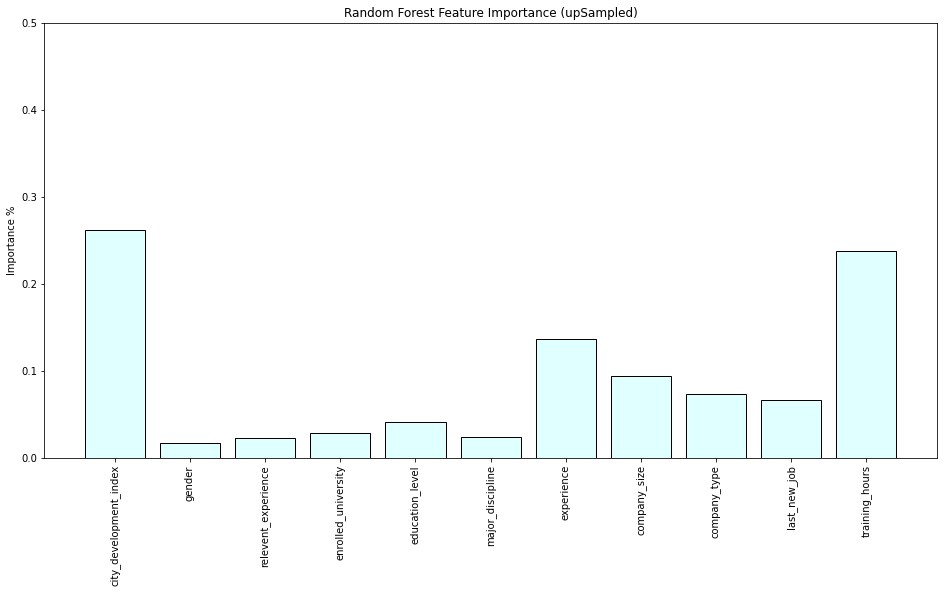

In [58]:
featurePlot(labels,rf_up,"Random Forest Feature Importance (upSampled)",'lightcyan')

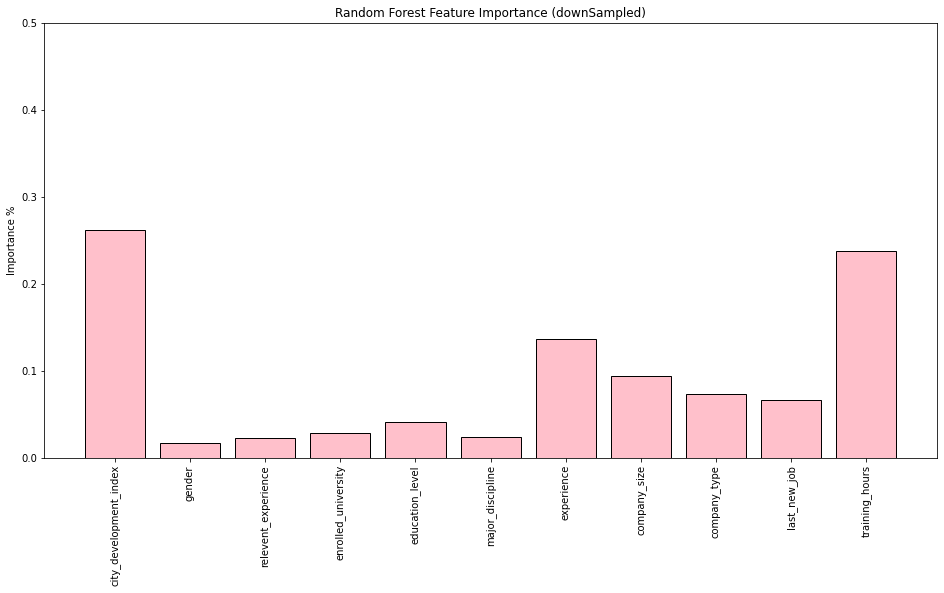

In [59]:
featurePlot(labels,rf_up,"Random Forest Feature Importance (downSampled)",'pink')

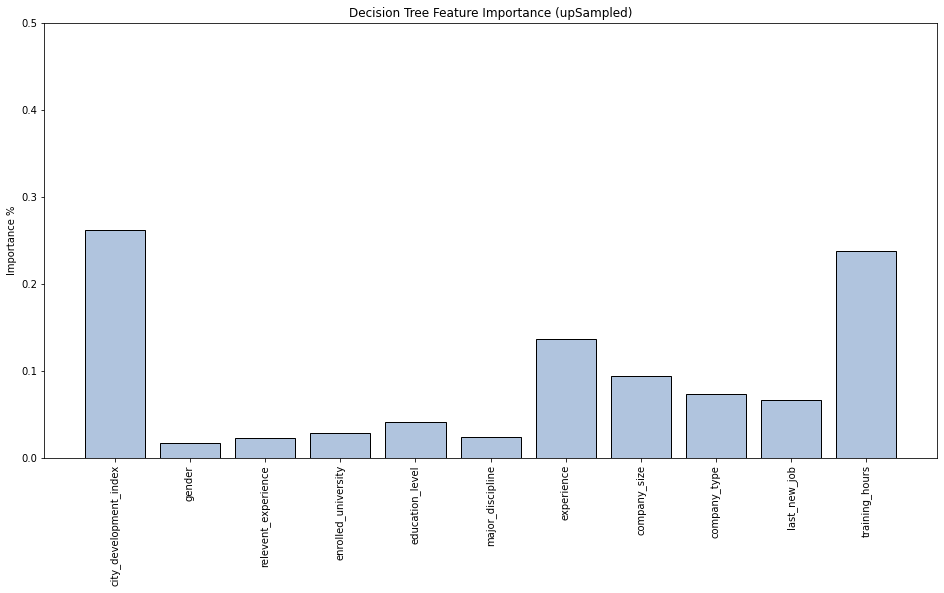

In [60]:
featurePlot(labels,rf_up,"Decision Tree Feature Importance (upSampled)",'lightsteelblue')

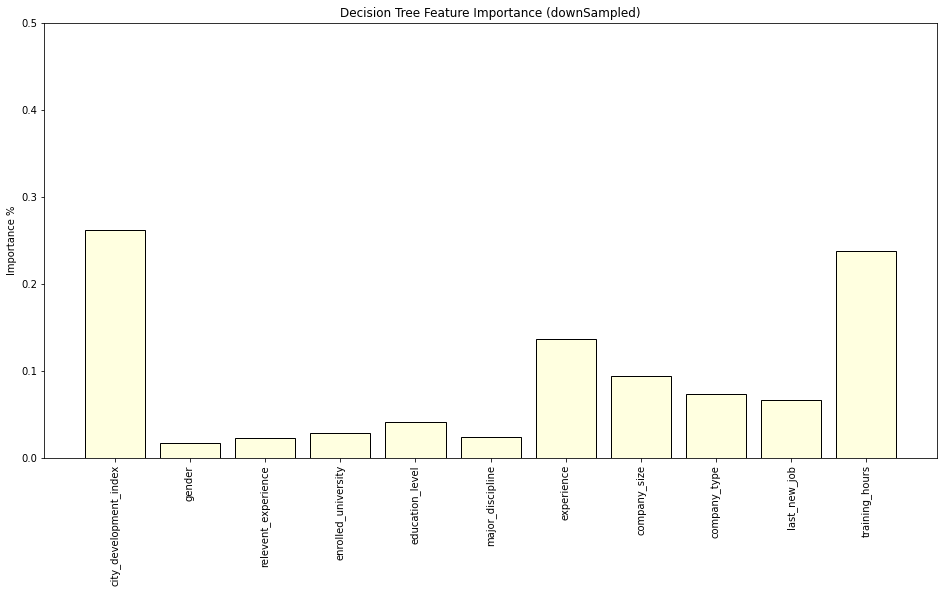

In [61]:
featurePlot(labels,rf_up,"Decision Tree Feature Importance (downSampled)",'lightyellow')